In [19]:
import pandas as pd

filename = '/Users/reuven/BambooWeekly/notebooks/data/bw-117-mes-0125.csv'

# Import the CSV file into a data frame. Make sure that the Time column is treated as a datetime value. Remove rows in which the Country column is from the OECD or IEA.

In [28]:
df = (pd
      .read_csv(filename,
               encoding='Latin-1',
               header=8,
               parse_dates=['Time'],
               date_format='%B %Y')
      .loc[lambda df_: ~df_['Country'].str.contains('OECD|IEA')]
     )

df

,Country,Time,Balance,Product,Value,Unit
0,Australia,2025-01-01,Net Electricity Production,Electricity,24339.7201,GWh
1,Australia,2025-01-01,Net Electricity Production,Hydro,934.8261,GWh
2,Australia,2025-01-01,Net Electricity Production,Total Combustible Fuels,13845.2112,GWh
3,Australia,2025-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",9948.2225,GWh
4,Australia,2025-01-01,Net Electricity Production,Oil and Petroleum Products,318.1188,GWh
...,...,...,...,...,...,...
149009,United States,2010-01-01,Total Exports,Electricity,996.5670,GWh
149010,United States,2010-01-01,Used for pumped storage,Electricity,2283.3220,GWh
149011,United States,2010-01-01,Distribution Losses,Electricity,22933.2970,GWh
149012,United States,2010-01-01,Final Consumption (Calculated),Electricity,343866.4180,GWh


In [29]:
df.dtypes

Country            object
Time       datetime64[ns]
Balance            object
Product            object
Value             float64
Unit               object
dtype: object

In [30]:
df.shape

(131172, 6)

# Create a bar plot showing the 10 countries that had the greatest total net electricity production in 2025.

<Axes: xlabel='Country'>

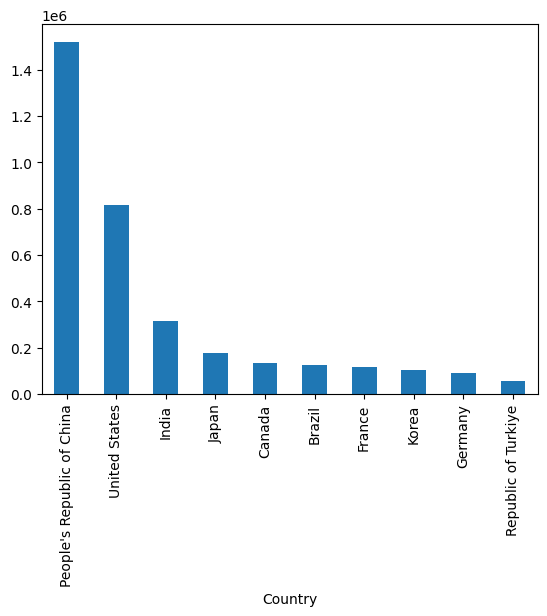

In [35]:
(
    df
    .loc[lambda df_: df_['Time'].dt.year == 2025]
    .loc[lambda df_: df_['Balance'] == 'Net Electricity Production']
    .loc[lambda df_: ~df_['Product'].str.contains('Total')]
    .groupby('Country')['Value'].sum()
    .nlargest(10)
    .plot.bar()
)